In [1]:
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
from sklearn.metrics import confusion_matrix
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import numpy as np

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/7151CEM Computing individual project/Mental health in tech survey.csv')
features = data.columns[:-1].tolist()
print(data.shape)

(1259, 27)


In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [5]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [6]:
# First tranforms "United States" and "United Kingdom" to their initial US and UK respectively.
data['Country'].replace(to_replace = ['United States'],value = 'US', inplace = True)
data['Country'].replace(to_replace = ['United Kingdom'],value = 'UK', inplace = True)

In [7]:
# Check to see how many respondents come from for each countries 
data['Country'].value_counts()

US                        751
UK                        185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Sweden                      7
Italy                       7
Poland                      7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Austria                     3
Finland                     3
Greece                      2
Croatia                     2
Portugal                    2
Colombia                    2
Denmark                     2
Hungary                     1
Moldova                     1
Latvia                      1
Thailand                    1
Costa Rica

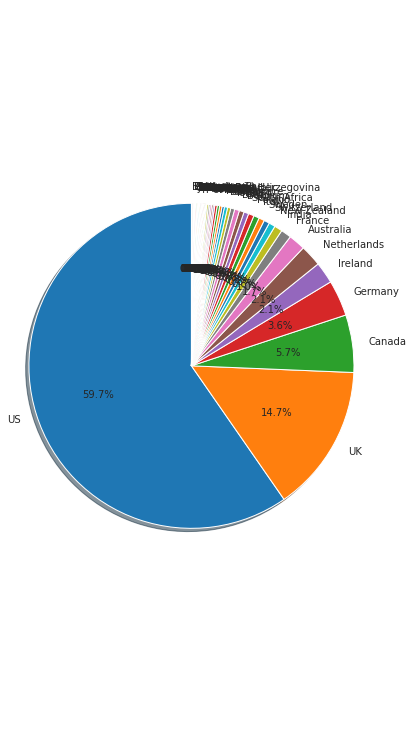

In [8]:
# Countries proportion 
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_axes((0,0,.5,1))
labels =  data['Country'].value_counts().index
sizes = data['Country'].value_counts()
percentages = sizes / 1259 * 100

ax1.pie(percentages, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.savefig('distributionofsurvey.png')

plt.show()

plt.close()

In [9]:
total_nulls = data.isnull().sum().sort_values(ascending=False)
percent_nulls = (total_nulls/data.isnull().count()).sort_values(ascending=False)
nulls = pd.concat([total_nulls, percent_nulls], axis=1, keys=['Total','Percentages'])
nulls.head()
print(nulls)

                           Total  Percentages
comments                    1095     0.869738
state                        515     0.409055
work_interfere               264     0.209690
self_employed                 18     0.014297
benefits                       0     0.000000
Age                            0     0.000000
Gender                         0     0.000000
Country                        0     0.000000
family_history                 0     0.000000
treatment                      0     0.000000
no_employees                   0     0.000000
remote_work                    0     0.000000
tech_company                   0     0.000000
care_options                   0     0.000000
obs_consequence                0     0.000000
wellness_program               0     0.000000
seek_help                      0     0.000000
anonymity                      0     0.000000
leave                          0     0.000000
mental_health_consequence      0     0.000000
phys_health_consequence        0  

In [10]:
data.drop(columns=['Timestamp','comments'],inplace=True)

In [11]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [12]:
data['work_interfere'].fillna('NA', inplace = True)
data['work_interfere'].value_counts()

Sometimes    465
NA           264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64